# LightGBM
리프 중심 트리 분할 방식 사용

**11.2**

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url='https://media.githubusercontent.com/media/musthave-ML10/data_source/main/fraud.csv'
data=pd.read_csv(file_url)

In [54]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

Non-null count 나오지 않음.

판다스에서는 데이터가 너무 클 때는 생략함

In [56]:
data.info(show_counts=True) #Non-null count보이도록

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1852394 non-null  object 
 1   cc_num                 1852394 non-null  int64  
 2   merchant               1852394 non-null  object 
 3   category               1852394 non-null  object 
 4   amt                    1852394 non-null  float64
 5   first                  1852394 non-null  object 
 6   last                   1852394 non-null  object 
 7   gender                 1852394 non-null  object 
 8   street                 1852394 non-null  object 
 9   city                   1852394 non-null  object 
 10  state                  1852394 non-null  object 
 11  zip                    1852394 non-null  int64  
 12  lat                    1852394 non-null  float64
 13  long                   1852394 non-null  float64
 14  city_pop          

결측치 없음.

In [57]:
round(data.describe(),2)

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1.852394e+06,1852394.00,1852394.00,1852394.00
mean,4.173860e+17,70.06,48813.26,38.54,-90.23,88643.67,1.358674e+09,38.54,-90.23,0.01
std,1.309115e+18,159.25,26881.85,5.07,13.75,301487.62,1.819508e+07,5.11,13.76,0.07
min,6.041621e+10,1.00,1257.00,20.03,-165.67,23.00,1.325376e+09,19.03,-166.67,0.00
25%,1.800429e+14,9.64,26237.00,34.67,-96.80,741.00,1.343017e+09,34.74,-96.90,0.00
50%,3.521417e+15,47.45,48174.00,39.35,-87.48,2443.00,1.357089e+09,39.37,-87.44,0.00
75%,4.642255e+15,83.10,72042.00,41.94,-80.16,20328.00,1.374581e+09,41.96,-80.25,0.00
max,4.992346e+18,28948.90,99921.00,66.69,-67.95,2906700.00,1.388534e+09,67.51,-66.95,1.00


목표변수 is_fraud의 평균값이 0.01로 매우 낮음. fraud인 경우가 1%로 매우 낮기 때문에 이점을 유의해서 분석 및 해석 필요. 정확도가 99%이더라도 좋은 모델이라고 보장할 수 없음. - 비대칭 데이터: 한쪽으로 치우친 데이터

**11.3 전처리: 데이터 클리닝**

없어도 될 것 같다는 확신이 들거나 굳이 이용하지 않겠다고 생각하는 변수 추리기
-> 이름 관련 변수 제외하기, stree,city,state,zip은 위도 경도 정보로 충분하다고 생각해 제외하기, 중복값이 없는 거래에 대한 id 제외하기, 거래 시간 정보는 날짜시간변수를 사용하면 되기 때문에 제거, 직업 변수는 종류가 적으면 더미변수로 활용할 수 잇으나 종류가 많기 때문에 제거, 거래 상정 변수 제거,,카테고리 변수로 대체 가능하고 카드로 어떤 상점이든 이용할수 있으니 미래 정보를 고려할 때 거래 상정 변수는 오버피팅 야기 가능

In [58]:
data.drop(['first','last','street','city','city','state','zip','trans_num','unix_time','job','merchant'],axis=1,inplace=True) #변수 제거

In [59]:
data['trans_date_trans_time']=pd.to_datetime(data['trans_date_trans_time']) #날짜 형식으로 변환

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 12 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   category               object        
 3   amt                    float64       
 4   gender                 object        
 5   lat                    float64       
 6   long                   float64       
 7   city_pop               int64         
 8   dob                    object        
 9   merch_lat              float64       
 10  merch_long             float64       
 11  is_fraud               int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(3)
memory usage: 169.6+ MB


이상거래 감지는 기존 거래 패턴에서 벗어나는 경우 감지
ex) 서울에서 카드 사용하던 사람이 해외에서 고액의 물건 구매, 주류매장 이용한 적 없는데 주류매장에서 고액 결제
-> 이런 경우 해당 결제를 잠시 보류하고 고객에게 문자/메일로 확인받는 시스템

소비 패턴 파악을 위해 Z점수(표준점수) 사용

In [61]:
amt_info=data.groupby('cc_num')['amt'].agg(['mean','std']).reset_index() #cc_num별 amt 평균과 표준편차 계산

In [62]:
amt_info.head()

,cc_num,mean,std
0,60416207185,59.257796,142.869746
1,60422928733,65.483159,92.042844
2,60423098130,96.376084,1000.693872
3,60427851591,107.487550,131.014534
4,60487002085,64.096925,153.207660


In [63]:
data=data.merge(amt_info,on='cc_num',how='left') #데이터 합치기

In [64]:
data['amt_z_score']=(data['amt']-data['mean'])/data['std'] #z-score 계산

In [65]:
data[['amt','mean','std','amt_z_score']].head()

,amt,mean,std,amt_z_score
0,4.97,89.408743,127.530101,-0.662108
1,107.23,56.078113,159.201852,0.321302
2,220.11,69.924272,116.688602,1.287064
3,45.00,80.090040,280.077880,-0.125287
4,41.96,95.341146,94.322842,-0.565941


인덱스 2행 특이

In [66]:
data.drop(['mean','std'],axis=1,inplace=True) #z-score 구할 때만 필요하므로 제거

각 개인마다 어떤 범주에 얼마만큼의 금액을 쓰는지 다름. 이에 대한 z점수 구하기

In [67]:
category_info=data.groupby(['cc_num','category'])['amt'].agg(['mean','std']).reset_index()

In [68]:
data=data.merge(category_info,on=['cc_num','category'],how='left') #데이터 합치기

In [69]:
data['cat_z_score']=(data['amt']-data['mean'])/data['std']
data.drop(['mean','std'],axis=1,inplace=True)

고객의 위치와 상점의 위치가 있기 때문에 이 둘 사이의 거리를 계산할 수 있음

In [70]:
import geopy.distance

In [71]:
data['merch_coord']=pd.Series(zip(data['merch_lat'],data['merch_long'])) #상점 위치 위도 경도 한 변수로 합치기
data['cust_coord']=pd.Series(zip(data['lat'],data['long'])) #고객 주소에 대한 위도 경도 한 변수로 합치기

In [72]:
data['distance']=data.apply(lambda x: geopy.distance.distance(x['merch_coord'],x['cust_coord']).km,axis=1)

In [73]:
import time
time.time()

1757870169.3181252

In [74]:
start_time=time.time()
data['distance']=data.apply(lambda x: geopy.distance.distance(x['merch_coord'], x['cust_coord']).km,axis=1)
end_time=time.time()
print(end_time-start_time)

202.6411817073822


In [75]:
distance_info=data.groupby('cc_num')['distance'].agg(['mean','std']).reset_index()
data=data.merge(distance_info,on='cc_num',how='left')
data['distance_z_score']=(data['distance']-data['mean'])/data['std']
data.drop(['mean','std'],axis=1,inplace=True)
data.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z_score,cat_z_score,merch_coord,cust_coord,distance,distance_z_score
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,-0.662108,-0.688297,"(36.011293, -82.048315)","(36.0788, -81.1781)",78.773821,0.030974
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,0.317631,"(49.159047, -118.186462)","(48.8878, -118.2105)",30.216618,-1.475224
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,1.287064,2.872509,"(43.150704, -112.154481)","(42.1808, -112.262)",108.102912,1.160572
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,-0.125287,-1.050197,"(47.034331, -112.561071)","(46.2306, -112.1138)",95.685115,0.818063
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,-0.565941,1.312866,"(38.674999, -78.632459)","(38.4207, -79.4629)",77.702395,0.064037


In [76]:
data['age']=2021-pd.to_datetime(data['dob']).dt.year #2021년 기준 나이 계산

In [77]:
data.drop(['cc_num','lat','long','merch_lat','merch_long','dob','merch_coord','cust_coord'],axis=1,inplace=True) #변수 제거
data.head()

,trans_date_trans_time,category,amt,gender,city_pop,is_fraud,amt_z_score,cat_z_score,distance,distance_z_score,age
0,2019-01-01 00:00:18,misc_net,4.97,F,3495,0,-0.662108,-0.688297,78.773821,0.030974,33
1,2019-01-01 00:00:44,grocery_pos,107.23,F,149,0,0.321302,0.317631,30.216618,-1.475224,43
2,2019-01-01 00:00:51,entertainment,220.11,M,4154,0,1.287064,2.872509,108.102912,1.160572,59
3,2019-01-01 00:01:16,gas_transport,45.00,M,1939,0,-0.125287,-1.050197,95.685115,0.818063,54
4,2019-01-01 00:03:06,misc_pos,41.96,M,99,0,-0.565941,1.312866,77.702395,0.064037,35


In [78]:
data=pd.get_dummies(data,columns=['category','gender'],drop_first=True) #더미변수 변환

In [79]:
data.set_index('trans_date_trans_time',inplace=True) #훈련셋 분리시키는 데에 활용하기 위해 남겨둔 변수 imdex로 변환
data.head()

,amt,city_pop,is_fraud,amt_z_score,cat_z_score,distance,distance_z_score,age,category_food_dining,category_gas_transport,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
trans_date_trans_time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:18,4.97,3495,0,-0.662108,-0.688297,78.773821,0.030974,33,False,False,...,False,False,False,True,False,False,False,False,False,False
2019-01-01 00:00:44,107.23,149,0,0.321302,0.317631,30.216618,-1.475224,43,False,False,...,False,False,False,False,False,False,False,False,False,False
2019-01-01 00:00:51,220.11,4154,0,1.287064,2.872509,108.102912,1.160572,59,False,False,...,False,False,False,False,False,False,False,False,False,True
2019-01-01 00:01:16,45.00,1939,0,-0.125287,-1.050197,95.685115,0.818063,54,False,True,...,False,False,False,False,False,False,False,False,False,True
2019-01-01 00:03:06,41.96,99,0,-0.565941,1.312866,77.702395,0.064037,35,False,False,...,False,False,False,False,True,False,False,False,False,True


**11.5 모델링 및 평가하기**

신용카드의 이상거래를 감지하는 상황은 지금까지 발생한 거래 데이터를 기반으로 모델을 학습시키고, 그 모델을 이용하여 앞으로 일어나는 거래에 대한 이상 여부를 예측해야 함. 따라서 train_test_split() 사용하지 않고 특정 날짜를 기준으로 훈련셋과 시험셋 나눔

In [80]:
train=data[data.index<'2020-07-01']
test=data[data.index>='2020-07-01']

In [81]:
len(test)/len(data) #시험셋 비율

0.2837738623640543

In [82]:
X_train=train.drop('is_fraud',axis=1)
X_test=test.drop('is_fraud',axis=1)
y_train=train['is_fraud']

In [83]:
y_test=test['is_fraud']

In [84]:
import lightgbm as lgb

lightbgm학습 시키는 함수로는 회귀, 분류, train()함수가 있음.

분류 함수를 이용한 모델링

In [85]:
model_1=lgb.LGBMClassifier(random_state=100)
model_1.fit(X_train,y_train)
pred_1=model_1.predict(X_test)

[LightGBM] [Info] Number of positive: 7639, number of negative: 1319094
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.052985 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1633
[LightGBM] [Info] Number of data points in the train set: 1326733, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005758 -> initscore=-5.151434
[LightGBM] [Info] Start training from score -5.151434


In [86]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score

In [87]:
accuracy_score(y_test,pred_1) #정확도 계산

0.9970760623291437

In [88]:
print(confusion_matrix(y_test,pred_1)) #혼동 행렬 확인

[[522933    716]
 [   821   1191]]


거짓 음성 - 821 : 이상거래를 잡아내지 못함,
거짓 양성 - 716 : 정상거래 건이 이상거래로 잘못 감지됨

In [89]:
print(classification_report(y_test,pred_1)) #분류 리포트 확인

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.62      0.59      0.61      2012

    accuracy                           1.00    525661
   macro avg       0.81      0.80      0.80    525661
weighted avg       1.00      1.00      1.00    525661



이상거래를 조금 더 포착하는 것이 중요. 제2종오류 줄이는 것이 중요 -> 재현율 중요

predict_proba()를 사용해 0,1이 아닌 소수점 형태의 결과 얻을 수 있음

In [90]:
proba_1=model_1.predict_proba(X_test) #예측

In [91]:
proba_1

array([[9.99968780e-01, 3.12200159e-05],
       [9.99973950e-01, 2.60503888e-05],
       [9.99960796e-01, 3.92036962e-05],
       ...,
       [9.99964825e-01, 3.51746051e-05],
       [9.99844073e-01, 1.55926950e-04],
       [9.99945924e-01, 5.40758390e-05]])

각 행은 각 데이터에 대한 예측값. 첫 번째 값은 0에 대한, 두 번째 값은 1에 대한 예측값. 둘의 합은 1!

In [92]:
proba_1[:,1] #1일 가능성을 예측하는 것이 우리가 알고싶은 것이기 때문에 1에 대한 예측 결과만 출력

array([3.12200159e-05, 2.60503888e-05, 3.92036962e-05, ...,
       3.51746051e-05, 1.55926950e-04, 5.40758390e-05])

In [93]:
proba_1=proba_1[:,1] #예측 결과 재설정

In [94]:
proba_int1=(proba_1>0.2).astype('int') #0.2
proba_int2=(proba_1>0.8).astype('int') #0.8 기준으로 분류

True/False로 결과가 나오므로 0,1로 변환하기 위해 astype('int')

In [95]:
print(confusion_matrix(y_test,proba_int1))

[[522105   1544]
 [   598   1414]]


In [96]:
print(classification_report(y_test,proba_int1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.48      0.70      0.57      2012

    accuracy                           1.00    525661
   macro avg       0.74      0.85      0.78    525661
weighted avg       1.00      1.00      1.00    525661



0.2기준 결과. 참 양성이 늘엇지만 동시에 거짓 양성 또한 늘었음. 정밀도 떨어지고, 재현율 개선됨.

In [97]:
print(confusion_matrix(y_test,proba_int2))

[[523183    466]
 [   958   1054]]


In [98]:
print(classification_report(y_test,proba_int2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.69      0.52      0.60      2012

    accuracy                           1.00    525661
   macro avg       0.85      0.76      0.80    525661
weighted avg       1.00      1.00      1.00    525661



참 양성이 조금 줄었지만, 거짓 양성은 줄고, 거짓 음성은 증가. -> 정상거래 건을 이상거래로 잘 못 의심하는 경우는 줄었으나 이상거래를 놓치는 경우 너무 많아짐. 정밀도는 높아졋지만 재현율 떨어짐.

여러 모델을 만들고 그 성능을 비교할 때 주로 어떤 값을 살펴봄? -> 모델에 따라 최적의 기준점은 달라짐. -> AUC

ROC- TOC(민감도):1good, FPR(특이도)-0good
AUC: 모델이 얼마나 0과 1을 잘 분리하는지!

In [99]:
roc_auc_score(y_test,proba_1)

np.float64(0.9366009328741358)

높은 편. 종속변수가 한쪽으로 편향된 경우 자연스럽게 높게 나오는 경향이 있으므로 반드시 매우 좋다고 해석할 수는 없음.

**11.6 하이퍼파라미터 튜닝: 랜덤 그리드 서치**

더 짧은 시간에 다양하게 활용.모든 조합을 시도하지 않고 일부만 랜덤으로 선택해 모델링. 덜 좋은 모델이 나올 수 있으나 시간적인 부분에서 큰 장점.

In [108]:
from sklearn.model_selection import RandomizedSearchCV

In [109]:
params={
    'n_estimators':[100,500,1000],
    'learning_rate':[0.01,0.05,0.1,0.3],
    'lambda_l1':[0,10,20,30,50], #L1정규화-불필요한 변수 자동으로 배제
    'lambda_l2':[0,10,20,30,50], #L2정규화-일부 매개변수가 0이 되도록 패널티 가할 수 이ㅆ음
    'max_depth':[5,10,15,20],
    'subsample':[0.6,0.8,2]}

In [110]:
#모델링
model_2=lgb.LGBMClassifier(random_state=100)
rs=RandomizedSearchCV(model_2,param_distributions=params,n_iter=30,scoring='roc_auc',random_state=100,n_jobs=-1)#n_iter: 몇 번 반복할 것인가를 정의. 전체 파라미터의 조합 중 몇 개를 사용할 것인지.

In [111]:
start=time.time()
rs.fit(X_train,y_train)
print(time.time()-start)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
55 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/lightgbm/sklearn.py", line 1560, in fit
    super().fit(
  File "/usr/local/lib/python3.12/dist-packages/lightgbm/sklearn.py", line 1049, in fit
    self._Booster = train(
                    ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/lightgbm/engine.py",

[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Info] Number of positive: 7639, number of negative: 1319094
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025960 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1633
[LightGBM] [Info] Number of data points in the train set: 1326733, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005758 -> initscore=-5.151434
[LightGBM] [Info] Start training from score -5.151434
2114.301519393921


In [112]:
rs.best_params_ #최적 하이퍼파라미터 확인

{'subsample': 0.6,
 'n_estimators': 1000,
 'max_depth': 20,
 'learning_rate': 0.01,
 'lambda_l2': 10,
 'lambda_l1': 10}

In [113]:
rs_proba=rs.predict_proba(X_test)
roc_auc_score(y_test,rs_proba[:,1])

[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10


np.float64(0.9945091567015584)

하이퍼파라미터 튜닝 전보다 높아짐

In [114]:
rs_proba_int=(rs_proba[:,1]>0.2).astype('int')
print(confusion_matrix(y_test,rs_proba_int))

[[522346   1303]
 [   467   1545]]


참양성과 거짓음성은 조금 나아짐. 거짓양성은 매우 좋아짐.
이상거래건을 감지해내면서 정상거래를 이상거래로 잘못 판단하는 경우 줄어들었음.

In [116]:
print(classification_report(y_test,rs_proba_int))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.54      0.77      0.64      2012

    accuracy                           1.00    525661
   macro avg       0.77      0.88      0.82    525661
weighted avg       1.00      1.00      1.00    525661



**11.7 LightGBM의 train()함수 사용하기**

날짜 기준으로 훈련셋/검증셋/시험셋 분리

In [118]:
train=data[data.index<'2020-01-01'] #훈련셋
val=data[(data.index>='2020-01-01')&(data.index<'2020-07-01')] #검증셋
test=data[data.index>='2020-07-01'] #시험셋

In [120]:
#독립변수와 종속변수 분리
X_train=train.drop('is_fraud',axis=1)
X_val=val.drop('is_fraud',axis=1)
X_test=test.drop('is_fraud',axis=1)
y_train=train['is_fraud']
y_val=val['is_fraud']
y_test=test['is_fraud']

In [122]:
#lightgbm이 제시하는 고유한 데이터셋 형태 취하기
d_train=lgb.Dataset(X_train,label=y_train)
d_val=lgb.Dataset(X_val,label=y_val)

In [123]:
#train함수에 하이퍼파라미터 입력하기
params_set=rs.best_params_ #최적 파라미터 설정
params_set['metrics']='auc'

In [124]:
params_set #하이퍼파라미터 확인

{'subsample': 0.6,
 'n_estimators': 1000,
 'max_depth': 20,
 'learning_rate': 0.01,
 'lambda_l2': 10,
 'lambda_l1': 10,
 'metrics': 'auc'}

In [128]:
from lightgbm import early_stopping, log_evaluation

model_3 = lgb.train(
    params_set,
    d_train,
    valid_sets=[d_val],
    callbacks=[
        early_stopping(stopping_rounds=100),  # 조기 종료
        log_evaluation(100)                   # 100번마다 로그 출력 (verbose_eval=100과 동일)
    ]
)


[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=20) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=1048576) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=20) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=1048576) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.125119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1633
[LightGBM] [Info] Number of data points in the train set: 924850, number of used features: 21
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=20) without explicitly 

n_estimators가 1000으로 들어갔기 때문에 총 1000개의 결과물이 출력됨. 출력물을 특정 간격 100,200,300.. 번째의 결과만 보여주도록 함.(verbose_eval)

earlt_stopping_rounds: 해당 숫자만큼 진행했음에도 더는 개선이 보이지 않으면 그 이상의 학습을 진행하지 않음 100개의 트리가 만들어졌음에도 개선이 되지 않으면 중지.

In [129]:
pred_3=model_3.predict(X_test)

In [131]:
roc_auc_score(y_test,pred_3) #예측값에 대한 AUC

np.float64(0.9617843071524317)

LGBM-편리
train검증셋-신뢰할만한 결과

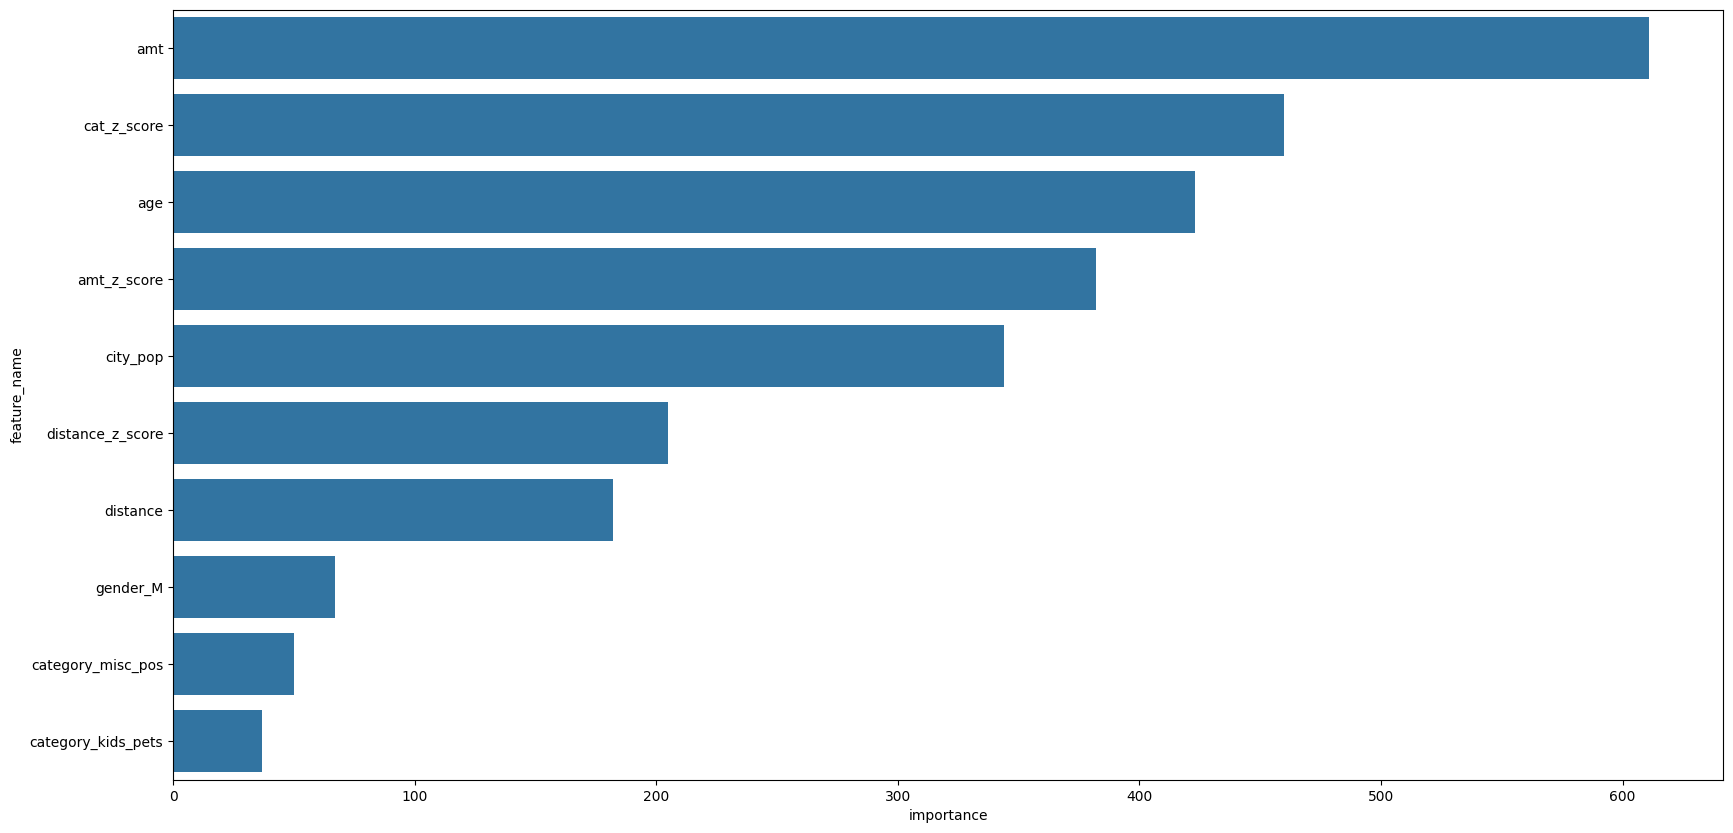

In [132]:
#LGBM중요도
feature_imp=pd.DataFrame({'feature_name':X_train.columns,'importance': model_1.feature_importances_}).sort_values('importance',ascending=False) #중요변수 정리
plt.figure(figsize=(20,10))
sns.barplot(x='importance',y='feature_name',data=feature_imp.head(10))
plt.show()

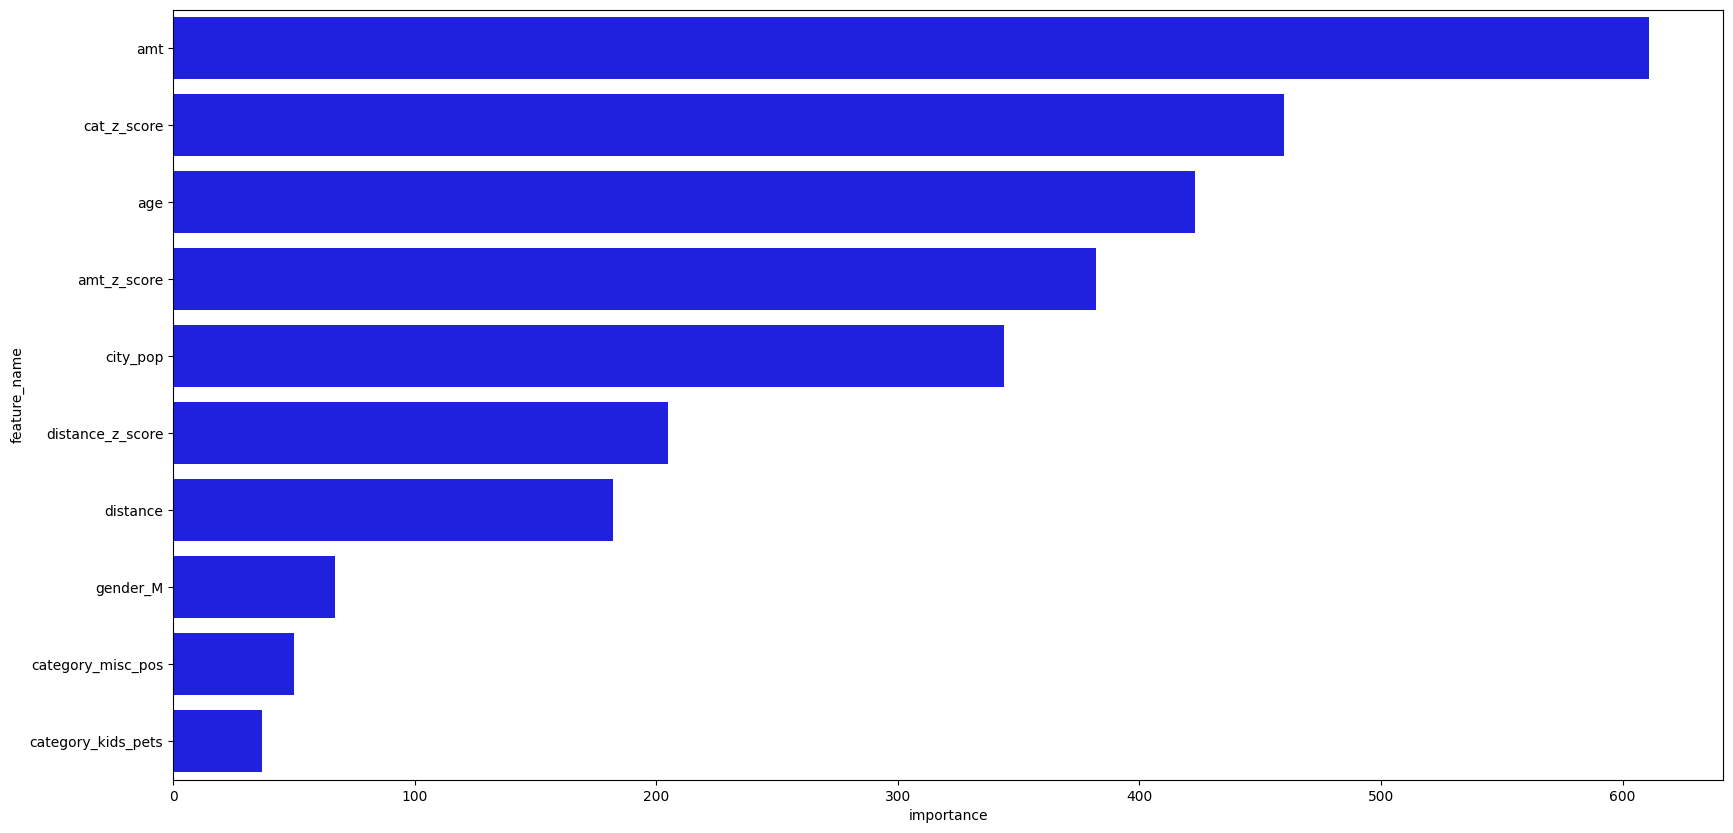

In [137]:
#train중요도
feature_imp_3=pd.DataFrame(sorted(zip(model_3.feature_importance(),X_train.columns)), columns=['Value','Feature']) #중요 변수 정리
plt.figure(figsize=(20,10))
sns.barplot(x='importance',y='feature_name',data=feature_imp.head(10),color='blue')
plt.show()

train() 함수를 사용할 때 검증셋의 비율은 어느정도로 설정하는 것이 적절한지 궁금합니다.